In [141]:
#importing necessary libraries
import numpy as np
import pandas as pd

In [142]:
#loading the data
df = pd.read_csv('Delinquent_customer-Insurance_Premium.csv')
df.head()

,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,GENDER,MARITAL_STATUS,RESIDENTIAL_PHONE,RESIDENCE_TYPE,EMAIL,PROFESSIONAL_PHONE,PROFESSION_CODE,OCCUPATION_TYPE,...,QUANT_DEPENDANTS,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,QUANT_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,MONTHS_IN_THE_JOB,AGE,TARGET_LABEL
0,Web,1,F,6,Y,1,1,N,9,4,...,1,15,900.0,0.0,0,0.0,0,0,32,1
1,Paper,1,F,2,Y,1,1,N,11,4,...,0,1,750.0,0.0,0,0.0,0,0,34,1
2,Web,1,F,2,Y,1,1,N,11,Missing,...,0,10,500.0,0.0,0,0.0,0,0,27,0
3,Web,1,F,2,N,Missing,1,N,Missing,Missing,...,0,10,500.0,0.0,0,0.0,0,0,61,0
4,Web,1,M,2,Y,1,1,N,9,5,...,0,12,1200.0,0.0,0,0.0,0,0,48,1


In [143]:
#shape of the data
df.shape

(50000, 22)

In [144]:
df.describe()

,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,EMAIL,PRODUCT,QUANT_ADDITIONAL_CARDS,QUANT_DEPENDANTS,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,QUANT_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,MONTHS_IN_THE_JOB,AGE,TARGET_LABEL
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.00000,50000.000000
mean,1.006540,2.14840,0.802280,1.275700,0.0,0.650520,9.747760,886.678437,35.434760,0.357840,2.322372e+03,0.336140,0.009320,43.24852,0.260820
std,0.080606,1.32285,0.398284,0.988286,0.0,1.193655,10.258212,7846.959327,891.515142,0.479953,4.235798e+04,0.472392,0.383453,14.98905,0.439086
min,1.000000,0.00000,0.000000,1.000000,0.0,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,6.00000,0.000000
25%,1.000000,1.00000,1.000000,1.000000,0.0,0.000000,2.000000,360.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,31.00000,0.000000
50%,1.000000,2.00000,1.000000,1.000000,0.0,0.000000,7.000000,500.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,41.00000,0.000000
75%,1.000000,2.00000,1.000000,1.000000,0.0,1.000000,14.000000,800.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000,53.00000,1.000000
max,2.000000,7.00000,1.000000,7.000000,0.0,53.000000,228.000000,959000.000000,194344.000000,2.000000,6.000000e+06,1.000000,35.000000,106.00000,1.000000


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   APPLICATION_SUBMISSION_TYPE  50000 non-null  object 
 1   POSTAL_ADDRESS_TYPE          50000 non-null  int64  
 2   GENDER                       50000 non-null  object 
 3   MARITAL_STATUS               50000 non-null  int64  
 4   RESIDENTIAL_PHONE            50000 non-null  object 
 5   RESIDENCE_TYPE               50000 non-null  object 
 6   EMAIL                        50000 non-null  int64  
 7   PROFESSIONAL_PHONE           50000 non-null  object 
 8   PROFESSION_CODE              50000 non-null  object 
 9   OCCUPATION_TYPE              50000 non-null  object 
 10  PRODUCT                      50000 non-null  int64  
 11  QUANT_ADDITIONAL_CARDS       50000 non-null  int64  
 12  QUANT_DEPENDANTS             50000 non-null  int64  
 13  MONTHS_IN_RESIDE

In [146]:
# To make our work easier let's start by getting the features which are highly correlated with the Target_Label

In [147]:
#correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix['TARGET_LABEL'])

POSTAL_ADDRESS_TYPE       -0.002423
MARITAL_STATUS            -0.030380
EMAIL                     -0.008067
PRODUCT                    0.019293
QUANT_ADDITIONAL_CARDS          NaN
QUANT_DEPENDANTS           0.012157
MONTHS_IN_RESIDENCE       -0.028296
PERSONAL_MONTHLY_INCOME    0.002819
OTHER_INCOMES              0.004442
QUANT_BANKING_ACCOUNTS     0.011997
PERSONAL_ASSETS_VALUE     -0.003886
QUANT_CARS                 0.011706
MONTHS_IN_THE_JOB         -0.007073
AGE                       -0.107886
TARGET_LABEL               1.000000
Name: TARGET_LABEL, dtype: float64


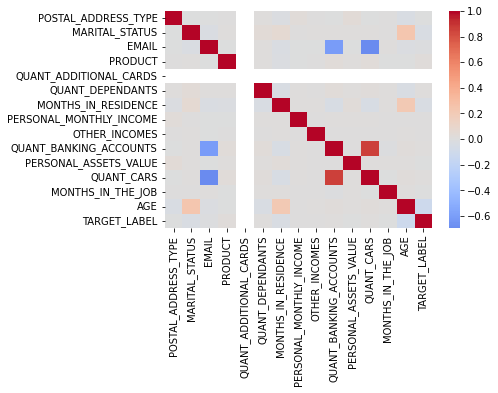

In [148]:
#Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.show()

In [149]:
# strongly correlated features
top_features = correlation_matrix['TARGET_LABEL'].sort_values(ascending = True)
print(top_features)

AGE                       -0.107886
MARITAL_STATUS            -0.030380
MONTHS_IN_RESIDENCE       -0.028296
EMAIL                     -0.008067
MONTHS_IN_THE_JOB         -0.007073
PERSONAL_ASSETS_VALUE     -0.003886
POSTAL_ADDRESS_TYPE       -0.002423
PERSONAL_MONTHLY_INCOME    0.002819
OTHER_INCOMES              0.004442
QUANT_CARS                 0.011706
QUANT_BANKING_ACCOUNTS     0.011997
QUANT_DEPENDANTS           0.012157
PRODUCT                    0.019293
TARGET_LABEL               1.000000
QUANT_ADDITIONAL_CARDS          NaN
Name: TARGET_LABEL, dtype: float64


In [150]:
top_five = correlation_matrix['TARGET_LABEL'].nlargest(5)
print(top_five)

TARGET_LABEL              1.000000
PRODUCT                   0.019293
QUANT_DEPENDANTS          0.012157
QUANT_BANKING_ACCOUNTS    0.011997
QUANT_CARS                0.011706
Name: TARGET_LABEL, dtype: float64


In [151]:
# we see that APPLICATION_SUBMISSION_TYPE, AGE, MARITAL_STATUS, MONTHS_IN_RESIDENCE, PERSONAL_MONTHLY_INCOME,
#  QUANT_CARS, QUANT_BANKING_ACCOUNTS, QUANT_DEPENDANTS are highly correlated with the TARGET_LABEL

In [152]:
# make new data set containing above features only

imp_features = ['APPLICATION_SUBMISSION_TYPE', 'GENDER', 'AGE' , 'MARITAL_STATUS', 'MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME','QUANT_CARS', 'QUANT_BANKING_ACCOUNTS','QUANT_DEPENDANTS','TARGET_LABEL']
df_impfeatures = df.loc[:,imp_features]
df_impfeatures.head()

,APPLICATION_SUBMISSION_TYPE,GENDER,AGE,MARITAL_STATUS,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,QUANT_CARS,QUANT_BANKING_ACCOUNTS,QUANT_DEPENDANTS,TARGET_LABEL
0,Web,F,32,6,15,900.0,0,0,1,1
1,Paper,F,34,2,1,750.0,0,0,0,1
2,Web,F,27,2,10,500.0,0,0,0,0
3,Web,F,61,2,10,500.0,0,0,0,0
4,Web,M,48,2,12,1200.0,0,0,0,1


In [153]:
#data types of all columns in dataset
print("Rows: ",df_impfeatures.shape[0])
print("Columns: ",df_impfeatures.shape[1])
print(df_impfeatures.dtypes)

Rows:  50000
Columns:  10
APPLICATION_SUBMISSION_TYPE     object
GENDER                          object
AGE                              int64
MARITAL_STATUS                   int64
MONTHS_IN_RESIDENCE              int64
PERSONAL_MONTHLY_INCOME        float64
QUANT_CARS                       int64
QUANT_BANKING_ACCOUNTS           int64
QUANT_DEPENDANTS                 int64
TARGET_LABEL                     int64
dtype: object


In [154]:
#NOW WE WILL BE PERFORMING OUR ANALYSIS ON OUR DATASET WHICH ONLY CONTAINS THE HIGHLY CORRELATED FEATURES

# Count the unique values in each column and display in a readable format
print("APPLICATION_SUBMISSION_TYPE:\n{}\n".format(df_impfeatures['APPLICATION_SUBMISSION_TYPE'].value_counts()))
print("GENDER:\n{}\n".format(df_impfeatures['GENDER'].value_counts()))
print("AGE:\n{}\n".format(df_impfeatures['AGE'].value_counts()))
print("MONTHS_IN_RESIDENCE:\n{}\n".format(df_impfeatures['MONTHS_IN_RESIDENCE'].value_counts()))
print("PERSONAL_MONTHLY_INCOME:\n{}\n".format(df_impfeatures['PERSONAL_MONTHLY_INCOME'].value_counts()))
print("QUANT_CARS:\n{}\n".format(df_impfeatures['QUANT_CARS'].value_counts()))
print("QUANT_BANKING_ACCOUNTS:\n{}\n".format(df_impfeatures['QUANT_BANKING_ACCOUNTS'].value_counts()))
print("QUANT_DEPENDANTS:\n{}\n".format(df_impfeatures['QUANT_DEPENDANTS'].value_counts()))
print("TARGET_LABEL:\n{}\n".format(df_impfeatures['TARGET_LABEL'].value_counts()))


APPLICATION_SUBMISSION_TYPE:
Web      28206
0        19461
Paper     2333
Name: APPLICATION_SUBMISSION_TYPE, dtype: int64

GENDER:
F          30805
M          19130
N             48
Missing       17
Name: GENDER, dtype: int64

AGE:
39     1299
36     1286
40     1269
37     1268
41     1253
       ... 
97        2
101       1
6         1
7         1
14        1
Name: AGE, Length: 89, dtype: int64

MONTHS_IN_RESIDENCE:
10     7576
1      7340
0      4695
5      3561
2      3217
       ... 
71        1
90        1
82        1
100       1
89        1
Name: MONTHS_IN_RESIDENCE, Length: 88, dtype: int64

PERSONAL_MONTHLY_INCOME:
350.00     6898
500.00     1453
400.00     1402
380.00     1362
600.00     1198
           ... 
412.39        1
406.78        1
2432.00       1
969.49        1
719.38        1
Name: PERSONAL_MONTHLY_INCOME, Length: 5495, dtype: int64

QUANT_CARS:
0    33193
1    16807
Name: QUANT_CARS, dtype: int64

QUANT_BANKING_ACCOUNTS:
0    32122
1    17864
2       14
Name: QUAN

In [155]:
print(df_impfeatures['GENDER'].unique())

# print(df_impfeatures['AGE'].value_counts())
# print(df_impfeatures['MONTHS_IN_RESIDENCE'].unique())
# print(df_impfeatures['PERSONAL_MONTHLY_INCOME'].value_counts())
# print(df_impfeatures['QUANT_CARS'].value_counts())
# print(df_impfeatures['QUANT_BANKING_ACCOUNTS'].unique())
# print(df_impfeatures['QUANT_DEPENDANTS'].value_counts())
# print(df_impfeatures['TARGET_LABEL'].value_counts())


['F' 'M' 'N' 'Missing']


In [156]:
# Gender column has missing value, so it's better we remove all the rows containing "Missing" from our data set

print(df_impfeatures.shape) # our data set has 50000 columns

df_impfeatures = df_impfeatures[df_impfeatures['GENDER'] != 'Missing']
df_impfeatures['APPLICATION_SUBMISSION_TYPE'] = df_impfeatures['APPLICATION_SUBMISSION_TYPE'].replace('0' ,'Other')

(50000, 10)


In [157]:
# our dataset has fewer rows after we removed all the rows containing the "Missing"
print("Shape: ",df_impfeatures.shape)

print(df_impfeatures['GENDER'].unique()) # Gender column only has three unique values: F, M, N

Shape:  (49983, 10)
['F' 'M' 'N']


In [158]:
df_impfeatures.dtypes

APPLICATION_SUBMISSION_TYPE     object
GENDER                          object
AGE                              int64
MARITAL_STATUS                   int64
MONTHS_IN_RESIDENCE              int64
PERSONAL_MONTHLY_INCOME        float64
QUANT_CARS                       int64
QUANT_BANKING_ACCOUNTS           int64
QUANT_DEPENDANTS                 int64
TARGET_LABEL                     int64
dtype: object

#  Perform EDA on each of the selected features with the TARGET_LABEL column

## Application Submission Type

In [159]:
#we replace 0 and 1 in target_label column with Non-Delinquent and Delinquent respectively to make it easier 
#for visualization
df_impfeatures['TARGET_LABEL'] = df_impfeatures['TARGET_LABEL'].replace({0:'Non-Delinquent',1:'Delinquent'})
df_impfeatures['TARGET_LABEL'].head()

0        Delinquent
1        Delinquent
2    Non-Delinquent
3    Non-Delinquent
4        Delinquent
Name: TARGET_LABEL, dtype: object

In [160]:
# group the dataset by GENDER and TARGET_LABEL and count the number of instances in each group
application_submission_count = df_impfeatures.groupby(['APPLICATION_SUBMISSION_TYPE','TARGET_LABEL']).size().reset_index(name='Count')

In [161]:
# pivot the table to put TARGET_LABEL values into separate columns
application_submission_count = application_submission_count.pivot(index='APPLICATION_SUBMISSION_TYPE', columns='TARGET_LABEL', values='Count')
print(application_submission_count)

TARGET_LABEL                 Delinquent  Non-Delinquent
APPLICATION_SUBMISSION_TYPE                            
Other                              5232           14216
Paper                               524            1808
Web                                7278           20925


In [162]:
#we see that application submitted online is more likely to be delinquent

In [163]:
application_submission_count['Delinquent %'] = (application_submission_count['Delinquent'] / (application_submission_count['Delinquent'] + application_submission_count['Non-Delinquent'])) * 100
application_submission_count['Non-Delinquent %'] = (application_submission_count['Non-Delinquent'] / (application_submission_count['Delinquent'] + application_submission_count['Non-Delinquent'])) * 100
print(application_submission_count)
# dis

TARGET_LABEL                 Delinquent  Non-Delinquent  Delinquent %  \
APPLICATION_SUBMISSION_TYPE                                             
Other                              5232           14216     26.902509   
Paper                               524            1808     22.469983   
Web                                7278           20925     25.805765   

TARGET_LABEL                 Non-Delinquent %  
APPLICATION_SUBMISSION_TYPE                    
Other                               73.097491  
Paper                               77.530017  
Web                                 74.194235  


In [164]:
submission_method_percentages = pd.DataFrame(columns=['Submission Method', 'Delinquent %', 'Non-Delinquent %'])

for method in application_submission_count.index:
    delinquent_percent = application_submission_count.loc[method, 'Delinquent %']
    non_delinquent_percent = application_submission_count.loc[method, 'Non-Delinquent %']
    
    submission_method_percentages = submission_method_percentages.append({'Submission Method': method,
                                                    'Delinquent %': delinquent_percent,
                                                    'Non-Delinquent %': non_delinquent_percent},
                                                   ignore_index=True)
    
print(submission_method_percentages)


  Submission Method Delinquent % Non-Delinquent %
0             Other    26.902509        73.097491
1             Paper    22.469983        77.530017
2               Web    25.805765        74.194235


/var/folders/xn/gbft823x5mx4sjzwb1jd4c440000gn/T/ipykernel_24762/2003710599.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  submission_method_percentages = submission_method_percentages.append({'Submission Method': method,
/var/folders/xn/gbft823x5mx4sjzwb1jd4c440000gn/T/ipykernel_24762/2003710599.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  submission_method_percentages = submission_method_percentages.append({'Submission Method': method,
/var/folders/xn/gbft823x5mx4sjzwb1jd4c440000gn/T/ipykernel_24762/2003710599.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  submission_method_percentages = submission_method_percentages.append({'Submission Method': method,


In [165]:
#we see that applications submitted through 'other(0)' method has the highest likelihood(26.90%) of delinquency out of all 
#methods

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

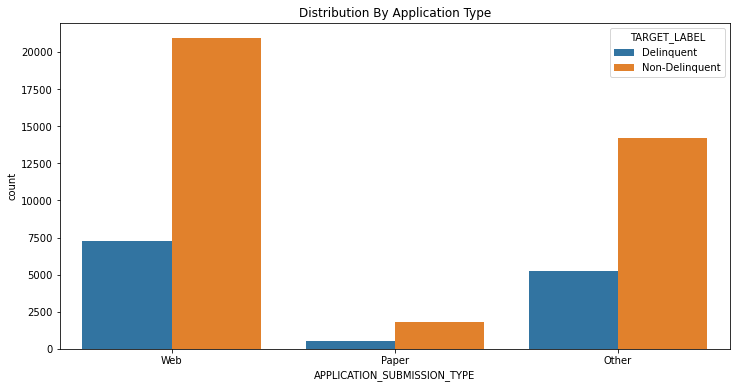

In [167]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x=df_impfeatures['APPLICATION_SUBMISSION_TYPE'], hue='TARGET_LABEL', data=df_impfeatures, ax=ax)
ax.set_title("Distribution By Application Type")
plt.show()

#the plot below supports our claim








## Age

In [168]:
df_impfeatures['AGE'].unique()

array([ 32,  34,  27,  61,  48,  40,  28,  31,  41,  36,  29,  19,  49,
        58,  69,  39,  42,  47,  30,  26,  60,  45,  56,  71,  38,  53,
        79,  22,  37,  55,  25,  67,  21,  50,  51,  84,  43,  44,  57,
        33,  20,  63,  62,  24,  54,  64,  92,  65,  73,  91,  35,  76,
        80,  59,  46,  70,  66,  52,  23,  77,  68,  18,  74,  72,  75,
        78,  83,  81,  98,  97,  85,  90,  87,  82,  17,  86,  94,  89,
        88,  96, 106,  95,  99, 101,  93,   6, 100,   7,  14])

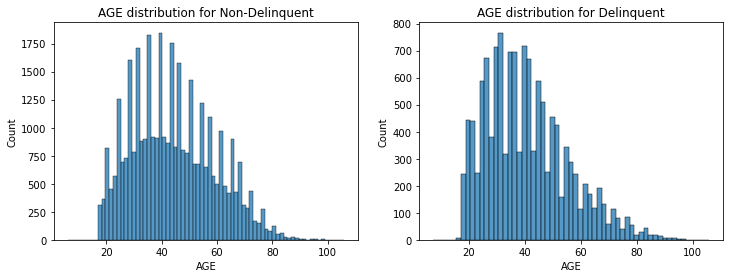

In [169]:
# create separate dataframes for each target label value
df_target_0 = df_impfeatures[df_impfeatures['TARGET_LABEL'] == 'Non-Delinquent']
df_target_1 = df_impfeatures[df_impfeatures['TARGET_LABEL'] == 'Delinquent']


# create histograms for AGE for both dataframes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
sns.histplot(x=df_target_0['AGE'], ax=ax1)
ax1.set(title='AGE distribution for Non-Delinquent')
sns.histplot(x=df_target_1['AGE'], ax=ax2)
ax2.set(title='AGE distribution for Delinquent')
plt.show()


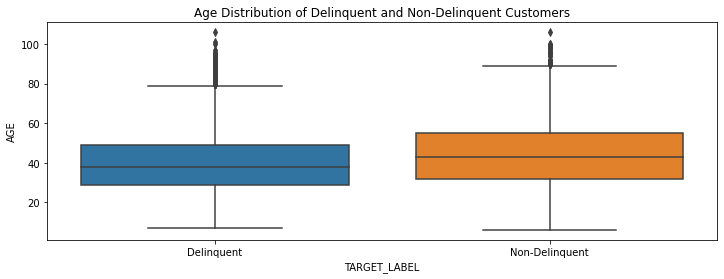

In [170]:
plt.figure(figsize = (12,4))
sns.boxplot(x='TARGET_LABEL', y='AGE', data=df_impfeatures)
plt.title('Age Distribution of Delinquent and Non-Delinquent Customers')
plt.show()

In [171]:
#two plots above shows that customers between the age group of 25-50 are equally
#likely to be delinquent and non-delinquent

### Extra for Age

In [172]:
df_temp = df_impfeatures
df_temp.head()

,APPLICATION_SUBMISSION_TYPE,GENDER,AGE,MARITAL_STATUS,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,QUANT_CARS,QUANT_BANKING_ACCOUNTS,QUANT_DEPENDANTS,TARGET_LABEL
0,Web,F,32,6,15,900.0,0,0,1,Delinquent
1,Paper,F,34,2,1,750.0,0,0,0,Delinquent
2,Web,F,27,2,10,500.0,0,0,0,Non-Delinquent
3,Web,F,61,2,10,500.0,0,0,0,Non-Delinquent
4,Web,M,48,2,12,1200.0,0,0,0,Delinquent


In [173]:
bins = [0, 15, 30, 40, 50, 60, 70, 80, 100, 150]
labels = ['0-14', '15-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-100', '101-150']
df_temp['age_group'] = pd.cut(df_temp['AGE'], bins=bins, labels=labels)

df_temp.head()

,APPLICATION_SUBMISSION_TYPE,GENDER,AGE,MARITAL_STATUS,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,QUANT_CARS,QUANT_BANKING_ACCOUNTS,QUANT_DEPENDANTS,TARGET_LABEL,age_group
0,Web,F,32,6,15,900.0,0,0,1,Delinquent,30-39
1,Paper,F,34,2,1,750.0,0,0,0,Delinquent,30-39
2,Web,F,27,2,10,500.0,0,0,0,Non-Delinquent,15-29
3,Web,F,61,2,10,500.0,0,0,0,Non-Delinquent,60-69
4,Web,M,48,2,12,1200.0,0,0,0,Delinquent,40-49


In [174]:
# Calculate the percentage of delinquent and non-delinquent individuals in each age group
df_grouped = df_temp.groupby(['age_group', 'TARGET_LABEL']).size().unstack()
df_grouped['total'] = df_grouped.sum(axis=1)

print(df_grouped)

df_grouped['delinquent_percentage'] = df_grouped['Delinquent'].sum() / df_grouped['total'].sum()
df_grouped['non-delinquent_percentage'] = df_grouped['Non-Delinquent'].sum() / df_grouped['total'].sum()

#df_grouped

TARGET_LABEL  Delinquent  Non-Delinquent  total
age_group                                      
0-14                   2               1      3
15-29               3732            7579  11311
30-39               3514            8991  12505
40-49               2795            8248  11043
50-59               1574            6078   7652
60-69                875            4196   5071
70-79                396            1563   1959
80-100               144             292    436
101-150                2               1      3


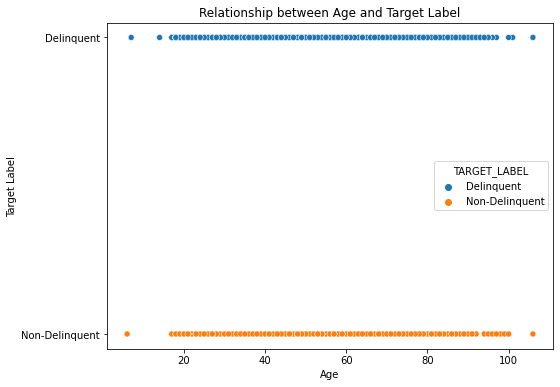

In [175]:
#scatter plot

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x='AGE', y='TARGET_LABEL', data=df_impfeatures, hue='TARGET_LABEL', ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Target Label')
ax.set_title('Relationship between Age and Target Label')
plt.show()





## Gender


In [176]:
df_impfeatures.columns

Index(['APPLICATION_SUBMISSION_TYPE', 'GENDER', 'AGE', 'MARITAL_STATUS',
       'MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME', 'QUANT_CARS',
       'QUANT_BANKING_ACCOUNTS', 'QUANT_DEPENDANTS', 'TARGET_LABEL',
       'age_group'],
      dtype='object')

In [177]:
df_impfeatures['GENDER'].value_counts()
#no. of neutrals is really small in our dataset, so we can also ignore them but who cares

F    30805
M    19130
N       48
Name: GENDER, dtype: int64

In [178]:
#for age we do same as we did for "application_submission_type"

gender_count = df_impfeatures.groupby(['GENDER','TARGET_LABEL']).size().reset_index(name='Count')
gender_count = gender_count.pivot(index='GENDER', columns='TARGET_LABEL', values='Count')
print(gender_count)

TARGET_LABEL  Delinquent  Non-Delinquent
GENDER                                  
F                   7790           23015
M                   5228           13902
N                     16              32


In [179]:
##we see that male are more likely to be delinquent

In [180]:
gender_count['Delinquent %'] = (gender_count['Delinquent'] / (gender_count['Delinquent'] + gender_count['Non-Delinquent'])) * 100
gender_count['Non-Delinquent %'] = (gender_count['Non-Delinquent'] / (gender_count['Delinquent'] + gender_count['Non-Delinquent'])) * 100
print(gender_count)

TARGET_LABEL  Delinquent  Non-Delinquent  Delinquent %  Non-Delinquent %
GENDER                                                                  
F                   7790           23015     25.288103         74.711897
M                   5228           13902     27.328803         72.671197
N                     16              32     33.333333         66.666667


In [181]:
gender_percentages = pd.DataFrame(columns=['Gender', 'Delinquent %', 'Non-Delinquent %'])

for gender in gender_count.index:
    delinquent_percent = gender_count.loc[gender, 'Delinquent %']
    non_delinquent_percent = gender_count.loc[gender, 'Non-Delinquent %']
    
    gender_percentages = gender_percentages.append({'Gender': gender,
                                                    'Delinquent %': delinquent_percent,
                                                    'Non-Delinquent %': non_delinquent_percent},
                                                   ignore_index=True)
    
print(gender_percentages)


  Gender Delinquent % Non-Delinquent %
0      F    25.288103        74.711897
1      M    27.328803        72.671197
2      N    33.333333        66.666667


/var/folders/xn/gbft823x5mx4sjzwb1jd4c440000gn/T/ipykernel_24762/3466771854.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gender_percentages = gender_percentages.append({'Gender': gender,
/var/folders/xn/gbft823x5mx4sjzwb1jd4c440000gn/T/ipykernel_24762/3466771854.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gender_percentages = gender_percentages.append({'Gender': gender,
/var/folders/xn/gbft823x5mx4sjzwb1jd4c440000gn/T/ipykernel_24762/3466771854.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gender_percentages = gender_percentages.append({'Gender': gender,


In [182]:
#we see that statistically "Neutral" has the highest likelihood(33.33%) of delinquency
#since we have the small sample space for neutral we can ignore that category and conclude that male are more likely
#to be delinquent(feminist finally got something to be proud of huh!)

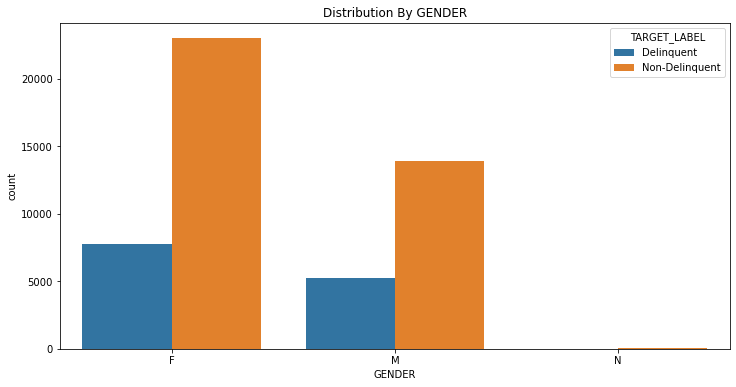

In [183]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x=df_impfeatures['GENDER'], hue='TARGET_LABEL', data=df_impfeatures, ax=ax)
ax.set_title("Distribution By GENDER")
plt.show()

## Marital Status

In [184]:
df_impfeatures['MARITAL_STATUS'].value_counts()

2    25957
1    15280
4     4205
6     1877
5     1296
3      632
7      534
0      202
Name: MARITAL_STATUS, dtype: int64

In [185]:
# with the marital status also we can do the same as we did with Gender

In [186]:
status_count = df_impfeatures.groupby(['MARITAL_STATUS','TARGET_LABEL']).size().reset_index(name='Count')
status_count = status_count.pivot(index='MARITAL_STATUS', columns='TARGET_LABEL', values='Count')
print(status_count)

TARGET_LABEL    Delinquent  Non-Delinquent
MARITAL_STATUS                            
0                       55             147
1                     4653           10627
2                     6272           19685
3                      139             493
4                      897            3308
5                      329             967
6                      547            1330
7                      142             392


In [187]:
status_count['Delinquent %'] = (status_count['Delinquent'] / (status_count['Delinquent'] + status_count['Non-Delinquent'])) * 100
status_count['Non-Delinquent %'] = (status_count['Non-Delinquent'] / (status_count['Delinquent'] + status_count['Non-Delinquent'])) * 100
print(status_count)

TARGET_LABEL    Delinquent  Non-Delinquent  Delinquent %  Non-Delinquent %
MARITAL_STATUS                                                            
0                       55             147     27.227723         72.772277
1                     4653           10627     30.451571         69.548429
2                     6272           19685     24.163039         75.836961
3                      139             493     21.993671         78.006329
4                      897            3308     21.331748         78.668252
5                      329             967     25.385802         74.614198
6                      547            1330     29.142248         70.857752
7                      142             392     26.591760         73.408240


In [188]:
status_percentages = pd.DataFrame(columns=['Marital Status', 'Delinquent %', 'Non-Delinquent %'])

for status in status_count.index:
    delinquent_percent = status_count.loc[status, 'Delinquent %']
    non_delinquent_percent = status_count.loc[status, 'Non-Delinquent %']
    
    status_percentages = status_percentages.append({'Marital Status': status,
                                                    'Delinquent %': delinquent_percent,
                                                    'Non-Delinquent %': non_delinquent_percent},
                                                   ignore_index=True)
    
print(status_percentages)


  Marital Status Delinquent % Non-Delinquent %
0            0.0    27.227723        72.772277
1            1.0    30.451571        69.548429
2            2.0    24.163039        75.836961
3            3.0    21.993671        78.006329
4            4.0    21.331748        78.668252
5            5.0    25.385802        74.614198
6            6.0    29.142248        70.857752
7            7.0     26.59176         73.40824


/var/folders/xn/gbft823x5mx4sjzwb1jd4c440000gn/T/ipykernel_24762/4086833623.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  status_percentages = status_percentages.append({'Marital Status': status,
/var/folders/xn/gbft823x5mx4sjzwb1jd4c440000gn/T/ipykernel_24762/4086833623.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  status_percentages = status_percentages.append({'Marital Status': status,
/var/folders/xn/gbft823x5mx4sjzwb1jd4c440000gn/T/ipykernel_24762/4086833623.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  status_percentages = status_percentages.append({'Marital Status': status,
/var/folders/xn/gbft823x5mx4sjzwb1jd4c440000gn/T/ipykernel_24762/4086833623.py:7: FutureWarning: The frame.append method is dep

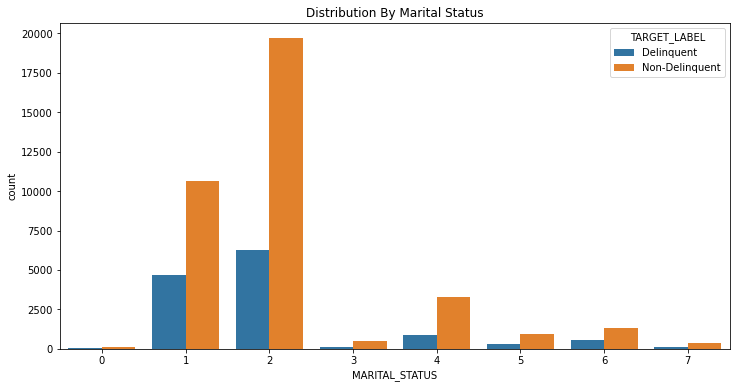

In [189]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x=df_impfeatures['MARITAL_STATUS'], hue='TARGET_LABEL', data=df_impfeatures, ax=ax)
ax.set_title("Distribution By Marital Status")
plt.show()

In [190]:
# we see that customers with martial status 1(30.45%) and marital status 6(29.14) have higher likelyhood 
#of deliquency

In [191]:
df_impfeatures.columns

Index(['APPLICATION_SUBMISSION_TYPE', 'GENDER', 'AGE', 'MARITAL_STATUS',
       'MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME', 'QUANT_CARS',
       'QUANT_BANKING_ACCOUNTS', 'QUANT_DEPENDANTS', 'TARGET_LABEL',
       'age_group'],
      dtype='object')

In [192]:
features = ['MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME', 'QUANT_CARS',
       'QUANT_BANKING_ACCOUNTS', 'QUANT_DEPENDANTS', 'TARGET_LABEL']

In [193]:
for feature in features:
    print(f"\nFeature: {feature}")
    print(df_impfeatures[feature].value_counts())


Feature: MONTHS_IN_RESIDENCE
10     7573
1      7338
0      4695
5      3561
2      3216
       ... 
71        1
90        1
82        1
100       1
89        1
Name: MONTHS_IN_RESIDENCE, Length: 88, dtype: int64

Feature: PERSONAL_MONTHLY_INCOME
350.00     6896
500.00     1453
400.00     1401
380.00     1362
600.00     1198
           ... 
5732.55       1
2976.44       1
486.57        1
960.04        1
719.38        1
Name: PERSONAL_MONTHLY_INCOME, Length: 5493, dtype: int64

Feature: QUANT_CARS
0    33189
1    16794
Name: QUANT_CARS, dtype: int64

Feature: QUANT_BANKING_ACCOUNTS
0    32116
1    17853
2       14
Name: QUANT_BANKING_ACCOUNTS, dtype: int64

Feature: QUANT_DEPENDANTS
0     33644
1      7003
2      5360
3      2464
4       860
5       365
6       138
7        65
8        35
9        14
10       13
11        7
12        6
13        4
14        3
15        1
53        1
Name: QUANT_DEPENDANTS, dtype: int64

Feature: TARGET_LABEL
Non-Delinquent    36949
Delinquent        13

In [194]:
#for those features having more unique values like MONTHS_IN_RESIDENCE, PERSONAL_MONTHLY_INCOME, QUANT_DEPENDANTS
#do exactly what we did with age
# and for other features do what we did with martial status and gender

In [195]:
df_impfeatures.columns


Index(['APPLICATION_SUBMISSION_TYPE', 'GENDER', 'AGE', 'MARITAL_STATUS',
       'MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME', 'QUANT_CARS',
       'QUANT_BANKING_ACCOUNTS', 'QUANT_DEPENDANTS', 'TARGET_LABEL',
       'age_group'],
      dtype='object')

# Building a Machine Learning Model

In [239]:
final_df = df_impfeatures.copy()
final_df.head()

,APPLICATION_SUBMISSION_TYPE,GENDER,AGE,MARITAL_STATUS,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,QUANT_CARS,QUANT_BANKING_ACCOUNTS,QUANT_DEPENDANTS,TARGET_LABEL,age_group
0,Web,F,32,6,15,900.0,0,0,1,Delinquent,30-39
1,Paper,F,34,2,1,750.0,0,0,0,Delinquent,30-39
2,Web,F,27,2,10,500.0,0,0,0,Non-Delinquent,15-29
3,Web,F,61,2,10,500.0,0,0,0,Non-Delinquent,60-69
4,Web,M,48,2,12,1200.0,0,0,0,Delinquent,40-49


In [240]:
#dropping age_group column from our final dataset
final_df = final_df.drop('age_group', axis = 1)

final_df.head()

,APPLICATION_SUBMISSION_TYPE,GENDER,AGE,MARITAL_STATUS,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,QUANT_CARS,QUANT_BANKING_ACCOUNTS,QUANT_DEPENDANTS,TARGET_LABEL
0,Web,F,32,6,15,900.0,0,0,1,Delinquent
1,Paper,F,34,2,1,750.0,0,0,0,Delinquent
2,Web,F,27,2,10,500.0,0,0,0,Non-Delinquent
3,Web,F,61,2,10,500.0,0,0,0,Non-Delinquent
4,Web,M,48,2,12,1200.0,0,0,0,Delinquent


In [241]:
# first we have to encode all the categorical feature columns to numeric value 

from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['APPLICATION_SUBMISSION_TYPE', 'GENDER', 'TARGET_LABEL']


encoders = {}
for feature in cols_to_encode:
    encoder = LabelEncoder()
    encoder.fit(final_df[feature])
    encoders[feature] = encoder

# Transform the categorical features using the encoders
for feature, encoder in encoders.items():
     final_df[feature] = encoder.transform(final_df[feature])

In [242]:
final_df.head()

,APPLICATION_SUBMISSION_TYPE,GENDER,AGE,MARITAL_STATUS,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,QUANT_CARS,QUANT_BANKING_ACCOUNTS,QUANT_DEPENDANTS,TARGET_LABEL
0,2,0,32,6,15,900.0,0,0,1,0
1,1,0,34,2,1,750.0,0,0,0,0
2,2,0,27,2,10,500.0,0,0,0,1
3,2,0,61,2,10,500.0,0,0,0,1
4,2,1,48,2,12,1200.0,0,0,0,0


In [243]:
print(encoders['GENDER'].classes_)
print(encoders['APPLICATION_SUBMISSION_TYPE'].classes_)
print(encoders['TARGET_LABEL'].classes_)

['F' 'M' 'N']
['Other' 'Paper' 'Web']
['Delinquent' 'Non-Delinquent']


In [244]:
#seperating feature matrix and target vector
X = final_df.drop('TARGET_LABEL', axis = 1)
y = final_df['TARGET_LABEL']
X.shape

(49983, 9)

In [245]:
X.head()

,APPLICATION_SUBMISSION_TYPE,GENDER,AGE,MARITAL_STATUS,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,QUANT_CARS,QUANT_BANKING_ACCOUNTS,QUANT_DEPENDANTS
0,2,0,32,6,15,900.0,0,0,1
1,1,0,34,2,1,750.0,0,0,0
2,2,0,27,2,10,500.0,0,0,0
3,2,0,61,2,10,500.0,0,0,0
4,2,1,48,2,12,1200.0,0,0,0


In [246]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: TARGET_LABEL, dtype: int64

In [247]:
from sklearn.model_selection import train_test_split

# Spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [248]:
print("X_train:",X_train.shape[0])
print("X_test:",X_test.shape[0])

X_train: 39986
X_test: 9997


In [249]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


In [ ]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())
]

# Evaluate each model on the training set using cross-validation
for name, model in models:
    cv_results = cross_validate(model, X_train, y_train, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])
    print(name)
    print(f"Training Accuracy: {cv_results['test_accuracy'].mean()}")
    print(f"Training Precision: {cv_results['test_precision'].mean()}")
    print(f"Training Recall: {cv_results['test_recall'].mean()}")
    print(f"Training F1-score: {cv_results['test_f1'].mean()}")
    print('---------------')
    


Logistic Regression
Training Accuracy: 0.7387835828391814
Training Precision: 0.7388020529394479
Training Recall: 0.9999661475964793
Training F1-score: 0.8497705897899588
---------------
Decision Tree
Training Accuracy: 0.6066375148064155
Training Precision: 0.743499826251548
Training Recall: 0.7138310839528151
Training F1-score: 0.7283569799307965
---------------
